In [1]:
!pip install langgraph langsmith

In [2]:
!pip install langchain langchain_groq langchain_community

In [3]:
!pip install python-dotenv

In [4]:
from dotenv import load_dotenv
import os
load_dotenv()

os.environ['GROQ_API_KEY'] = os.getenv('GROQ_API_KEY')

os.environ['LANGSMITH_API_KEY'] = os.getenv('LANGSMITH_API_KEY')
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="LangGraphChatBots"

In [5]:
from langchain_groq import ChatGroq

In [6]:
llm = ChatGroq(groq_api_key = os.environ['GROQ_API_KEY'], model_name = "llama-3.1-8b-instant")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x116852ea0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x116a8adb0>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********'))

<br>
<br>

## Lets start building the ChatBot using LangGraph

In [7]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages # More like Logs (for the states - as it keeps on changing)

In [8]:
class State(TypedDict): # Class to manage the states
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (In this case, it appends messages to the list, rather than overwriting them)
    messages:Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [9]:
graph_builder

In [10]:
# ChatBot Method

def chatBot(state: State):
    return {"messages": llm.invoke(state["messages"])}

In [11]:
# Adding the ChatBot to the Graph Builder

graph_builder.add_node("chatbot", chatBot)

In [12]:
graph_builder

In [13]:
# Connecting the ChatBot to the STAR and END nodes

graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

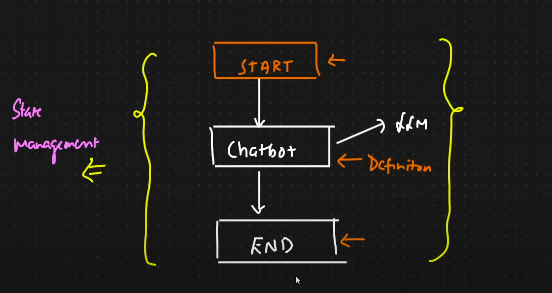

In [14]:
# Compile the Graph

graph = graph_builder.compile()

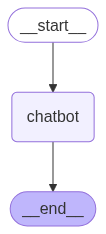

In [15]:
# # The Graph Diagram

# from IPython.display import Image, display

# try:
#     display(Image(graph_builder.get_graph().draw_mermaid_png()))
# except Exception:
#     pass

graph

In [16]:
while True:
    user_input = input("User : ") # Fetching input from the User
    if user_input.lower() in ["quit", "q"]:
        print("Good Bye !")
        break

    for event in graph.stream({"messages" : ("user", user_input)}):
        print(event.values())
        for value in event.values():
            print(value["messages"])
            print("Assistant: ", value["messages"].content) # Message from the LLM

dict_values([{'messages': AIMessage(content='Hello, how can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 36, 'total_tokens': 46, 'completion_time': 0.010399064, 'prompt_time': 0.001559202, 'queue_time': 0.187328267, 'total_time': 0.011958266}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_50a6be1b6f', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--fdc641de-d23b-48c9-96c7-240c73a1712e-0', usage_metadata={'input_tokens': 36, 'output_tokens': 10, 'total_tokens': 46})}])
content='Hello, how can I assist you today?' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 36, 'total_tokens': 46, 'completion_time': 0.010399064, 'prompt_time': 0.001559202, 'queue_time': 0.187328267, 'total_time': 0.011958266}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_50a6be1b6f', 'service_tier': 'on_demand', 'finish_rea